# Run-Workouts Data

In [1]:
import datetime as dt

In [2]:
import pathlib

In [3]:
import pandas as pd

In [4]:
home = pathlib.Path.home()

In [5]:
date_partition = "20200918"

In [6]:
data_input_path = f"{home}/small-data/apple-health-csv/full-extract/{date_partition}"

In [7]:
study_path = f"{home}/small-data/study/health-data/{date_partition}"

In [8]:
pathlib.Path(study_path).mkdir(parents=True,exist_ok=True)

In [9]:
workout = pd.read_csv(f"{data_input_path}/workout.csv",parse_dates=['startDate'], infer_datetime_format=True)

## Extract Runs From Workout Data

In [10]:
date_lowerbound = dt.datetime(2018,10, 17).astimezone()

In [11]:
date_upperbound = dt.datetime(2020,9,18).astimezone() #  use local time zone

In [12]:
runs = workout.loc[(workout['workoutActivityType'] == 'HKWorkoutActivityTypeRunning') & 
                   (workout['startDate'] >= date_lowerbound) &
                   (workout['startDate'] < date_upperbound), 
                   ['totalDistance', 'startDate',  'HKIndoorWorkout']]

In [13]:
runs.loc[:,'HKIndoorWorkout'] = runs['HKIndoorWorkout'].apply(lambda x: True if x == 1.0 else False)

In [14]:
runs = runs.rename(columns={
    'startDate': 'start_date',
    'totalDistance': 'miles',
    'HKIndoorWorkout': 'indoor_run'
})
                  

In [15]:
runs['year'] = runs['start_date'].map(lambda x: x.year)

In [16]:
runs['treadmill'] = runs.loc[runs['indoor_run'] == True, "miles"]

In [17]:
runs['outdoor'] = runs.loc[runs['indoor_run'] == False, "miles"]

In [18]:
del runs['indoor_run']

## Annual Run Miles

In [19]:
runstats = runs.groupby(by=runs['year']).sum()

In [20]:
runstats # show table data

,miles,treadmill,outdoor
year,,,
2018,14.698636,6.847012,7.851623
2019,416.403220,342.333181,74.070039
2020,688.403703,58.569700,629.834002


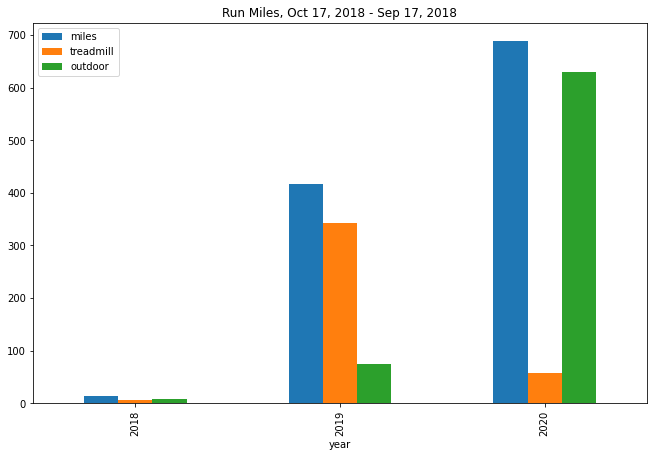

In [21]:
runstats_bp = runstats.plot.bar(y=['miles', 'treadmill', 'outdoor'], 
                                title='Run Miles, Oct 17, 2018 - Sep 17, 2018', 
                                figsize=(11, 7))

In [22]:
runstats_bp.get_figure().savefig(f"{study_path}/annual_run_miles")

### Annual Minimum 5K Runs

In [23]:
runs_5k_min = runs.loc[runs['miles'] >= 3.10]

In [24]:
runs_5k_min_by_year = runs_5k_min.groupby('year').count()

In [25]:
runs_5k_min_by_year

,miles,start_date,treadmill,outdoor
year,,,,
2018,1,1,0,1
2019,55,55,44,11
2020,117,117,0,117


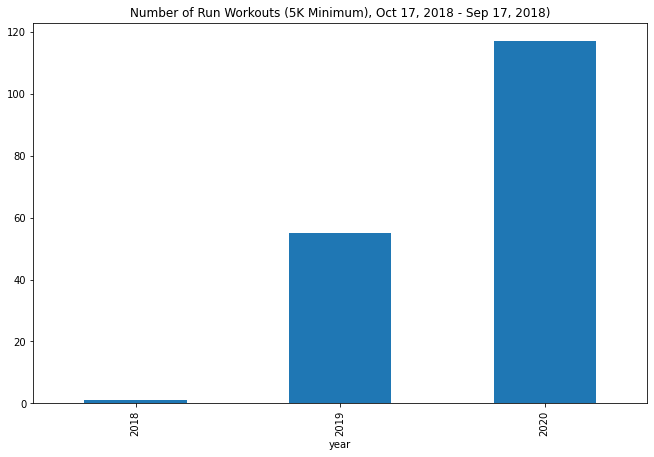

In [26]:
runstats_5k_min_bp = runs_5k_min_by_year.plot.bar(y='miles', legend=False, 
                                                  title='Number of Run Workouts (5K Minimum), Oct 17, 2018 - Sep 17, 2018)', 
                                                  figsize=(11, 7))

In [27]:
runstats_5k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_5k_min")

## Annual Minimum 10K Runs

In [28]:
runs_10k_min = runs.loc[runs['miles'] >= 6.20]

In [29]:
runs_10k_min_by_year = runs_10k_min.groupby('year').count()

In [30]:
runs_10k_min_by_year

,miles,start_date,treadmill,outdoor
year,,,,
2019,4,4,0,4
2020,27,27,0,27


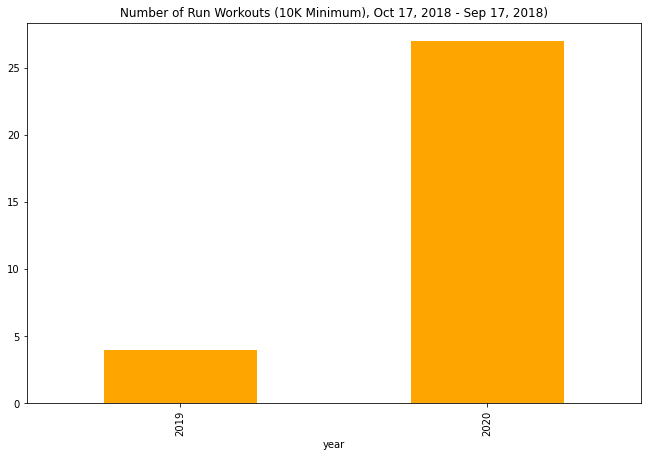

In [31]:
runstats_10k_min_bp = runs_10k_min_by_year.plot.bar(y='miles', color='orange', 
                                                    legend=False, 
                                                    title='Number of Run Workouts (10K Minimum), Oct 17, 2018 - Sep 17, 2018)', 
                                                    figsize=(11, 7))

In [32]:
runstats_10k_min_bp.get_figure().savefig(f"{study_path}/annual_runs_10k_min")